In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from astropy import constants as const
from astropy import units as u
import math
from astropy.constants import c, L_sun, sigma_sb, M_jup, M_earth

In [6]:

try:
    data = pd.read_csv('/home/anibal/Downloads/things/df_trilegal_radios.csv')
except:
    Radii_star = []
    for i in tqdm(range(len(data))):
        logL = data['logL'][i]  # log10 of the luminosity in Lsun from TRILEGAL
        logTe = data['logTe'][i]  # log10 of effective temperature in K from TRILEGAL
        L_star = 10**(logL)
        Teff = (10**(logTe))*u.K
        top = L_star*L_sun
        sigma = sigma_sb
        bot = 4*np.pi*sigma*Teff**4
        Rstar = np.sqrt(top/bot)
        Radii_star.append(Rstar.to('R_sun').value)

    data['radius']=Radii_star
    df_koshimoto_large = pd.read_csv('/home/anibal/genulens/tmp_new.dat', delim_whitespace=True, comment='#', header=None)
    header = ["wtj", "M_L", "D_L", "D_S", "tE", "thetaE", "piE", "piEN", "piEE", "mu_rel", "muSl", "muSb", "i_L", "iS",
              "iL", "fREM"]
    df_koshimoto_large.columns = header
    data["D_S"]=df_koshimoto_large["D_S"]
    data["D_L"]=df_koshimoto_large["D_L"]
    data["mu_rel"]=df_koshimoto_large["mu_rel"]

    data = data[['u','g','r','i','z','Y','W149','radius','D_S','D_L','mu_rel']]
    data = data[data['D_S']<8000]
    data.to_csv('/home/anibal/Downloads/df_trilegal_radios.csv', index=False)
    

print('The len() of the database is: ',len(data))
data.head()



The len() of the database is:  6752296


,u,g,r,i,z,Y,W149,radius,D_S,D_L,mu_rel
0,27.940,25.112,23.791,23.052,22.687,22.509,22.4888,0.204717,7708,3337,1.752341
1,32.152,28.801,27.358,25.353,24.371,23.905,23.7048,0.256539,5443,3490,3.368060
2,29.916,26.583,25.143,23.976,23.416,23.174,23.0758,0.377705,7715,4581,6.920123
3,19.718,18.786,18.695,18.736,18.808,18.839,19.3448,1.236383,6055,2758,9.626590
4,28.293,25.580,24.286,23.587,23.239,23.064,23.0568,0.232088,7359,6834,6.344430


In [7]:
# print(len(data))# data.columns = ['u', 'g', 'r', 'i', 'z', 'Y', 'W149', 'radius', 'D_S', 'D_L', 'mu_rel']#, 't0', 'tE', 'u0', 'rho', 'piEE', 'piEN']

In [8]:
# print((1*u.rad).to('mas'))
# aconv = (180 * 60 * 60 * 1000) / math.pi
# print(aconv)

In [9]:
ang_radii_E = []
radii_source = []
tstart_Roman = 2461508.763828608
dict_micro = {'t0': [],'te': [],'u0': [],'rho': [],'piEE': [],'piEN': []}
for i in tqdm(range(int(4e+4))):#len(data))):
    # ml = (50*u.M_sun).value
    ml = np.random.uniform((2 * u.M_sun).value, (150 * u.M_sun).value)
    ml = ml*u.M_sun
    DS = (data.iloc[i]['D_S'] * u.pc).to('kpc')
    DL = (data.iloc[i]['D_L'] * u.pc).to('kpc')
    c = const.c
    G = const.G
    yr2day = 365.25
    pi_rel = ((1 / DL) - (1 / DS))
    k = 4 * G / (c ** 2)
    aconv = (180 * 60 * 60 * 1000) / math.pi
    theta_E = np.sqrt(k * pi_rel * ml).decompose() * aconv
    mu_rel = data.iloc[i]['mu_rel']
    tE = float((theta_E/mu_rel)*yr2day)
    piE = float(pi_rel.value/theta_E)
    ang_radii_E.append(theta_E)
    Rstar = data['radius'][i]*u.R_sun
    theta_s = np.arctan(Rstar/DS).decompose().to('mas').value
    radii_source.append(theta_s)
    #------------------------------------------------------------------------------------------------
    # t0 = np.random.uniform(tstart_Roman,
                           # tstart_Roman + 5 * 365)  # from 100 day before Roman is launched to one year later
    u0 = np.random.uniform(0, 3)
    rho = float((theta_s/theta_E).value)
    phi = np.random.uniform(0, np.pi)
    piEE = piE * np.cos(phi)
    piEN = piE * np.sin(phi)
    q = np.random.uniform(0,1)
    d = np.random.uniform(0.1,28)
    s = float(((np.arctan(d*u.au/DL).to('mas'))/(theta_E)).value)
    # print(s)
    # print(theta_E)
    # s = np.random.uniform(0,np.arctan(d/dl)/theta_E)
    t0 = np.random.uniform(tstart_Roman,
                       tstart_Roman + 5 * 365)
    dict_micro['u0'].append(u0)
    dict_micro['te'].append(tE)
    dict_micro['rho'].append(rho)
    dict_micro['piEE'].append(piEE)
    dict_micro['piEN'].append(piEN)
    dict_micro['t0'].append(t0)

data = data.head(int(4e+4))
for key in dict_micro:
    data[key] = dict_micro[key]
data.head()


  0%|          | 0/40000 [00:00<?, ?it/s]

,u,g,r,i,z,Y,W149,radius,D_S,D_L,mu_rel,t0,te,u0,rho,piEE,piEN
0,27.940,25.112,23.791,23.052,22.687,22.509,22.4888,0.204717,7708,3337,1.752341,2.462970e+06,1656.410720,2.035848,0.000016,-0.017324,0.012536
1,32.152,28.801,27.358,25.353,24.371,23.905,23.7048,0.256539,5443,3490,3.368060,2.461921e+06,455.221659,2.605656,0.000052,0.016386,0.018203
2,29.916,26.583,25.143,23.976,23.416,23.174,23.0758,0.377705,7715,4581,6.920123,2.462858e+06,514.568756,2.428391,0.000023,0.004346,0.007990
3,19.718,18.786,18.695,18.736,18.808,18.839,19.3448,1.236383,6055,2758,9.626590,2.461852e+06,426.119229,2.286683,0.000085,0.002253,0.017434
4,28.293,25.580,24.286,23.587,23.239,23.064,23.0568,0.232088,7359,6834,6.344430,2.461784e+06,136.696231,1.457285,0.000062,-0.002854,0.003344


In [10]:
# print(len(data[data['rho']>0.1*data['u0']]))


In [11]:
# plt.hist(data['te'])
# plt.yscale('log')
# plt.show()
# plt.plot(data['u0'], data['rho'], marker='o', linestyle='')
# plt.yscale('log')

In [12]:
file_name = '/home/anibal/Downloads/BH_params.csv'
data.to_csv(file_name, index=False)

In [13]:
data = pd.read_csv(file_name)
data.head()

,u,g,r,i,z,Y,W149,radius,D_S,D_L,mu_rel,t0,te,u0,rho,piEE,piEN
0,27.940,25.112,23.791,23.052,22.687,22.509,22.4888,0.204717,7708,3337,1.752341,2.462970e+06,1656.410720,2.035848,0.000016,-0.017324,0.012536
1,32.152,28.801,27.358,25.353,24.371,23.905,23.7048,0.256539,5443,3490,3.368060,2.461921e+06,455.221659,2.605656,0.000052,0.016386,0.018203
2,29.916,26.583,25.143,23.976,23.416,23.174,23.0758,0.377705,7715,4581,6.920123,2.462858e+06,514.568756,2.428391,0.000023,0.004346,0.007990
3,19.718,18.786,18.695,18.736,18.808,18.839,19.3448,1.236383,6055,2758,9.626590,2.461852e+06,426.119229,2.286683,0.000085,0.002253,0.017434
4,28.293,25.580,24.286,23.587,23.239,23.064,23.0568,0.232088,7359,6834,6.344430,2.461784e+06,136.696231,1.457285,0.000062,-0.002854,0.003344


In [14]:
# plt.hist(data['alpha'])
# # plt.yscale('log')
# plt.xlabel('s', fontsize=20)

In [15]:
import pandas as pd
# Calculate the number of rows in each split
rows_per_split = 5000
num_splits = len(data) // rows_per_split
# Split the DataFrame into 8 pieces with approximately 5000 rows each
df_splits = [data.iloc[i * rows_per_split:(i + 1) * rows_per_split] for i in range(num_splits)]
# Save each split DataFrame to a CSV file

j = 0
for i, df_split in enumerate(df_splits):
    csv_filename = f'/home/anibal/results_roman_rubin/BH_split_{i + 1}.csv'
    df_split.to_csv(csv_filename, index=False)
    print(f"Split {i + 1} saved to {csv_filename}")
    j = j+1
    if j>8:
        break


Split 1 saved to /home/anibal/results_roman_rubin/BH_split_1.csv
Split 2 saved to /home/anibal/results_roman_rubin/BH_split_2.csv
Split 3 saved to /home/anibal/results_roman_rubin/BH_split_3.csv
Split 4 saved to /home/anibal/results_roman_rubin/BH_split_4.csv
Split 5 saved to /home/anibal/results_roman_rubin/BH_split_5.csv
Split 6 saved to /home/anibal/results_roman_rubin/BH_split_6.csv
Split 7 saved to /home/anibal/results_roman_rubin/BH_split_7.csv
Split 8 saved to /home/anibal/results_roman_rubin/BH_split_8.csv


In [16]:
# split_data = pd.read_csv('/home/anibal/results_roman_rubin/PB_split_4.csv', sep=',', decimal='.')
# display(split_data)
# plt.hist(split_data['te'])
# plt.yscale('log')
# print(len(split_data))

In [17]:
data['te']

0        1656.410720
1         455.221659
2         514.568756
3         426.119229
4         136.696231
            ...     
39995     362.913827
39996     637.593547
39997     140.488165
39998      86.891917
39999      32.774264
Name: te, Length: 40000, dtype: float64

(array([4012., 4090., 3909., 3955., 3925., 4102., 3940., 4027., 4046.,
        3994.]),
 array([6.09063323e-05, 3.00052782e-01, 6.00044657e-01, 9.00036533e-01,
        1.20002841e+00, 1.50002028e+00, 1.80001216e+00, 2.10000403e+00,
        2.39999591e+00, 2.69998779e+00, 2.99997966e+00]),
 <BarContainer object of 10 artists>)

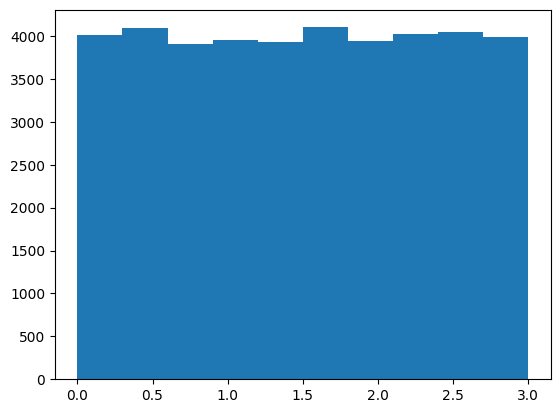

In [18]:
plt.hist(data['u0'])

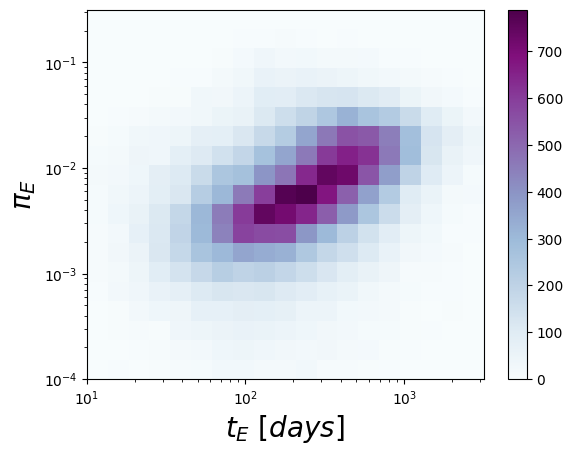

In [19]:
plt.hist2d(data['te'],np.sqrt(data['piEE']**2+data['piEE']**2),bins=(np.logspace(1,3.5,20),np.logspace(-4,-0.5,20)),cmap=plt.cm.BuPu)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$t_E \ [days]$', fontsize=20)
plt.ylabel(r'$\pi_E  $', fontsize=20)
plt.colorbar()
plt.show()

In [20]:
# plt.hist2d(data['u0'], data['rho'],
#            bins=(np.logspace(-3,1,20),np.logspace(-3,0.6,20)),cmap=plt.cm.BuPu)
# plt.yscale('log')
# plt.xscale('log')
# plt.xlabel(r'$\rho$', fontsize=20)
# plt.ylabel(r'$u_0$', fontsize=20)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.colorbar()
# plt.show()